In [8]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [9]:
# Dataset
data = {
    'sleep_hours': [4, 5, 6, 7, 8, 9, 10, 5, 6, 7],
    'screen_time': [9, 8, 7, 6, 5, 4, 3, 10, 9, 6],
    'stress_level': [1, 1, 1, 0, 0, 0, 0, 1, 1, 0]  # 1 = High stress, 0 = Low stress
}
df = pd.DataFrame(data)

In [10]:
X = df[['sleep_hours', 'screen_time']]
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [11]:
# Polynomial Kernel SVC
model = SVC(kernel='poly', degree=3, C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:

# Evaluation
print("\nModel 2: Mental Health Prediction (Poly Kernel)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Model 2: Mental Health Prediction (Poly Kernel)
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[2 0]
 [1 0]]
Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

c:\Users\MukhammadAyyub\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


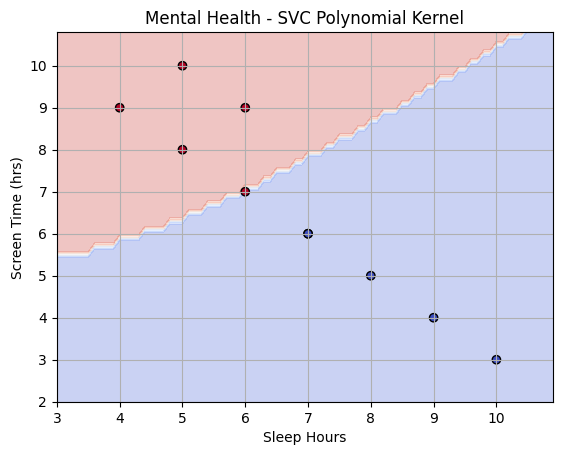

In [13]:

# Visualization
xx, yy = np.meshgrid(np.arange(X['sleep_hours'].min()-1, X['sleep_hours'].max()+1, 0.1),
                     np.arange(X['screen_time'].min()-1, X['screen_time'].max()+1, 0.2))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['sleep_hours'], X['screen_time'], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Mental Health - SVC Polynomial Kernel')
plt.xlabel('Sleep Hours')
plt.ylabel('Screen Time (hrs)')
plt.grid(True)
plt.show()
